# Disclaimer:

#### The data is about Asteroids – NeoWs (Near Earth Object Web Service. It is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids basedon their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall dataset. Inspiration is to find potential hazardous, non-hazardous asteroids and features responsible for claiming an asteroid to be hazardous.

# Task:

 #### In this notebook, the use of the 'xgboost' algorithm for classification is demonstrated. The scope of this case study is to predict whether an asteroid can be hazardous or not based on its characteristics/properties using XGBClassier , BayesianOptimization and RandomizedSearchCV function.

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
df =  pd.read_csv('nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [4]:
df.shape

(4687, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [6]:
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [7]:
df.duplicated().sum()

0

In [8]:
df.head(3)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True


In [9]:
for i in df.columns:
    print(i)

Neo Reference ID
Name
Absolute Magnitude
Est Dia in KM(min)
Est Dia in KM(max)
Est Dia in M(min)
Est Dia in M(max)
Est Dia in Miles(min)
Est Dia in Miles(max)
Est Dia in Feet(min)
Est Dia in Feet(max)
Close Approach Date
Epoch Date Close Approach
Relative Velocity km per sec
Relative Velocity km per hr
Miles per hour
Miss Dist.(Astronomical)
Miss Dist.(lunar)
Miss Dist.(kilometers)
Miss Dist.(miles)
Orbiting Body
Orbit ID
Orbit Determination Date
Orbit Uncertainity
Minimum Orbit Intersection
Jupiter Tisserand Invariant
Epoch Osculation
Eccentricity
Semi Major Axis
Inclination
Asc Node Longitude
Orbital Period
Perihelion Distance
Perihelion Arg
Aphelion Dist
Perihelion Time
Mean Anomaly
Mean Motion
Equinox
Hazardous


In [10]:
for i in df.columns:
    j = i.replace(' ','_')
    df.rename(columns = {i:j},inplace=True)

In [11]:
df.columns

Index(['Neo_Reference_ID', 'Name', 'Absolute_Magnitude', 'Est_Dia_in_KM(min)',
       'Est_Dia_in_KM(max)', 'Est_Dia_in_M(min)', 'Est_Dia_in_M(max)',
       'Est_Dia_in_Miles(min)', 'Est_Dia_in_Miles(max)',
       'Est_Dia_in_Feet(min)', 'Est_Dia_in_Feet(max)', 'Close_Approach_Date',
       'Epoch_Date_Close_Approach', 'Relative_Velocity_km_per_sec',
       'Relative_Velocity_km_per_hr', 'Miles_per_hour',
       'Miss_Dist.(Astronomical)', 'Miss_Dist.(lunar)',
       'Miss_Dist.(kilometers)', 'Miss_Dist.(miles)', 'Orbiting_Body',
       'Orbit_ID', 'Orbit_Determination_Date', 'Orbit_Uncertainity',
       'Minimum_Orbit_Intersection', 'Jupiter_Tisserand_Invariant',
       'Epoch_Osculation', 'Eccentricity', 'Semi_Major_Axis', 'Inclination',
       'Asc_Node_Longitude', 'Orbital_Period', 'Perihelion_Distance',
       'Perihelion_Arg', 'Aphelion_Dist', 'Perihelion_Time', 'Mean_Anomaly',
       'Mean_Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [12]:
categorical_cols = df.select_dtypes(include='object')
numeric_cols = df.select_dtypes(exclude='object')

In [13]:
for i in categorical_cols:
    if df[i].nunique() < 5:
        print(i)
    

Orbiting_Body
Equinox


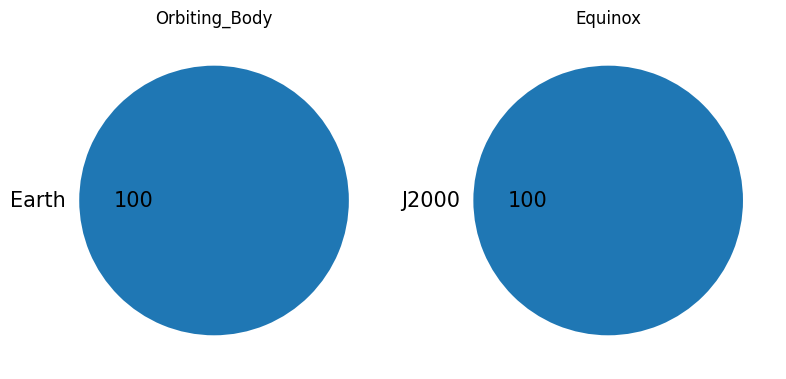

In [14]:
# Analysing distribution in Categorical varibales 
fig, axes = plt.subplots(1,2, figsize=(8, 7))

for i, c in enumerate(['Orbiting_Body','Equinox']):
    _ = df[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=15)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

## let's check num_columns too like cat that we have done

In [15]:
for j in numeric_cols:
    if df[j].nunique() < 20:
        print(j)

Orbit_Uncertainity
Hazardous


In [16]:
df['Orbit_Uncertainity'].value_counts()

0    1353
7     700
6     620
1     568
8     329
5     321
2     279
4     212
3     182
9     123
Name: Orbit_Uncertainity, dtype: int64

In [17]:
df.head(3)

,Neo_Reference_ID,Name,Absolute_Magnitude,Est_Dia_in_KM(min),Est_Dia_in_KM(max),Est_Dia_in_M(min),Est_Dia_in_M(max),Est_Dia_in_Miles(min),Est_Dia_in_Miles(max),Est_Dia_in_Feet(min),...,Asc_Node_Longitude,Orbital_Period,Perihelion_Distance,Perihelion_Arg,Aphelion_Dist,Perihelion_Time,Mean_Anomaly,Mean_Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True


# Actually,as we can see,we have checked the all features that some of them has only one variable,so,we don'd need them,let's delete them,also Neo_Reference_ID and Name is the same thing,both of them can be deleted

In [18]:
df.drop(df.iloc[:,0:1],inplace=True,axis=1)

In [19]:
df.drop(df.iloc[:,0:1],inplace=True,axis=1)

In [20]:
df.drop(['Orbiting_Body','Equinox'],axis=1,inplace=True)

In [21]:
df.head()

,Absolute_Magnitude,Est_Dia_in_KM(min),Est_Dia_in_KM(max),Est_Dia_in_M(min),Est_Dia_in_M(max),Est_Dia_in_Miles(min),Est_Dia_in_Miles(max),Est_Dia_in_Feet(min),Est_Dia_in_Feet(max),Close_Approach_Date,...,Inclination,Asc_Node_Longitude,Orbital_Period,Perihelion_Distance,Perihelion_Arg,Aphelion_Dist,Perihelion_Time,Mean_Anomaly,Mean_Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


/var/folders/2h/fvpsx_7j5qsbndf0sxjz6_d40000gn/T/ipykernel_5074/4062659681.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),mask=np.triu(np.ones_like(df.corr(), dtype=np.bool)),annot=True)
/var/folders/2h/fvpsx_7j5qsbndf0sxjz6_d40000gn/T/ipykernel_5074/4062659681.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df.corr(),mask=np.triu(np.ones_like(df.corr(), dtype=np.bool)),annot=True)


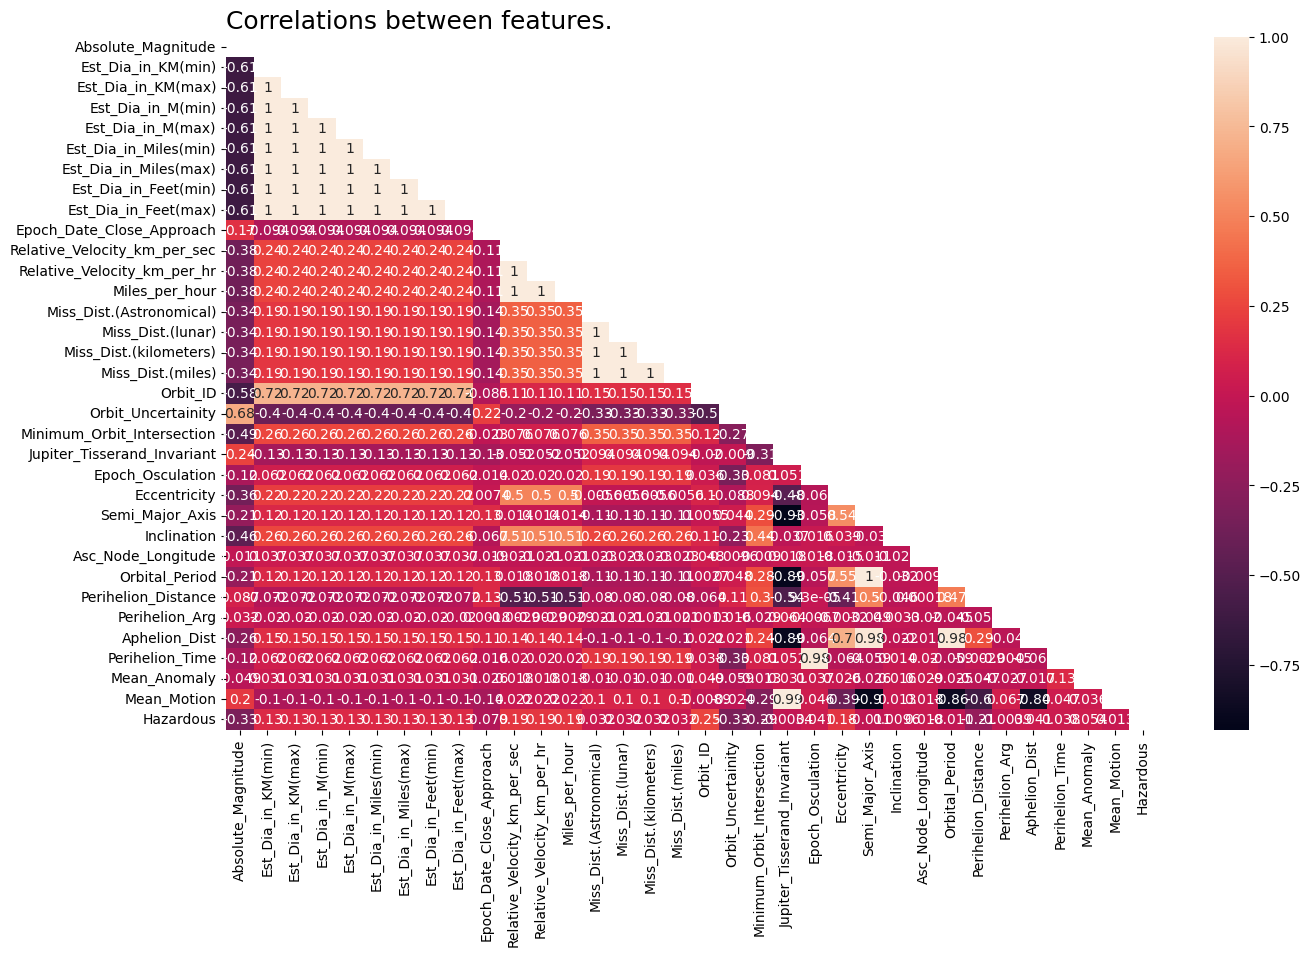

In [22]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),mask=np.triu(np.ones_like(df.corr(), dtype=np.bool)),annot=True)
title = 'Correlations between features.'
plt.title(title,loc='left',fontsize=18)
plt.show()

###### And We can see from the Heatmap,Some features are same as a impact to the Target Feature(Hazardous),We are gonna delete them all expect just one of them. 

In [23]:
df.columns

Index(['Absolute_Magnitude', 'Est_Dia_in_KM(min)', 'Est_Dia_in_KM(max)',
       'Est_Dia_in_M(min)', 'Est_Dia_in_M(max)', 'Est_Dia_in_Miles(min)',
       'Est_Dia_in_Miles(max)', 'Est_Dia_in_Feet(min)', 'Est_Dia_in_Feet(max)',
       'Close_Approach_Date', 'Epoch_Date_Close_Approach',
       'Relative_Velocity_km_per_sec', 'Relative_Velocity_km_per_hr',
       'Miles_per_hour', 'Miss_Dist.(Astronomical)', 'Miss_Dist.(lunar)',
       'Miss_Dist.(kilometers)', 'Miss_Dist.(miles)', 'Orbit_ID',
       'Orbit_Determination_Date', 'Orbit_Uncertainity',
       'Minimum_Orbit_Intersection', 'Jupiter_Tisserand_Invariant',
       'Epoch_Osculation', 'Eccentricity', 'Semi_Major_Axis', 'Inclination',
       'Asc_Node_Longitude', 'Orbital_Period', 'Perihelion_Distance',
       'Perihelion_Arg', 'Aphelion_Dist', 'Perihelion_Time', 'Mean_Anomaly',
       'Mean_Motion', 'Hazardous'],
      dtype='object')

In [24]:
df.drop(['Est_Dia_in_KM(max)','Est_Dia_in_M(min)','Est_Dia_in_M(max)',
         'Est_Dia_in_Miles(min)','Est_Dia_in_Miles(max)', 'Est_Dia_in_Feet(min)', 'Est_Dia_in_Feet(max)'],
          axis=1,inplace=True)

In [25]:
df.columns

Index(['Absolute_Magnitude', 'Est_Dia_in_KM(min)', 'Close_Approach_Date',
       'Epoch_Date_Close_Approach', 'Relative_Velocity_km_per_sec',
       'Relative_Velocity_km_per_hr', 'Miles_per_hour',
       'Miss_Dist.(Astronomical)', 'Miss_Dist.(lunar)',
       'Miss_Dist.(kilometers)', 'Miss_Dist.(miles)', 'Orbit_ID',
       'Orbit_Determination_Date', 'Orbit_Uncertainity',
       'Minimum_Orbit_Intersection', 'Jupiter_Tisserand_Invariant',
       'Epoch_Osculation', 'Eccentricity', 'Semi_Major_Axis', 'Inclination',
       'Asc_Node_Longitude', 'Orbital_Period', 'Perihelion_Distance',
       'Perihelion_Arg', 'Aphelion_Dist', 'Perihelion_Time', 'Mean_Anomaly',
       'Mean_Motion', 'Hazardous'],
      dtype='object')

In [26]:
df.drop(df.iloc[:,8:11],inplace=True,axis=1)

In [27]:
df.columns

Index(['Absolute_Magnitude', 'Est_Dia_in_KM(min)', 'Close_Approach_Date',
       'Epoch_Date_Close_Approach', 'Relative_Velocity_km_per_sec',
       'Relative_Velocity_km_per_hr', 'Miles_per_hour',
       'Miss_Dist.(Astronomical)', 'Orbit_ID', 'Orbit_Determination_Date',
       'Orbit_Uncertainity', 'Minimum_Orbit_Intersection',
       'Jupiter_Tisserand_Invariant', 'Epoch_Osculation', 'Eccentricity',
       'Semi_Major_Axis', 'Inclination', 'Asc_Node_Longitude',
       'Orbital_Period', 'Perihelion_Distance', 'Perihelion_Arg',
       'Aphelion_Dist', 'Perihelion_Time', 'Mean_Anomaly', 'Mean_Motion',
       'Hazardous'],
      dtype='object')

In [28]:
df.drop(df.iloc[:,4:6],inplace=True,axis=1)

/var/folders/2h/fvpsx_7j5qsbndf0sxjz6_d40000gn/T/ipykernel_5074/4138197869.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),mask=np.triu(np.ones_like(df.corr(),dtype=np.bool)),annot=True)
/var/folders/2h/fvpsx_7j5qsbndf0sxjz6_d40000gn/T/ipykernel_5074/4138197869.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df.corr(),mask=np.triu(np.ones_like(df.corr(),dtype=np.bool)),annot=True)


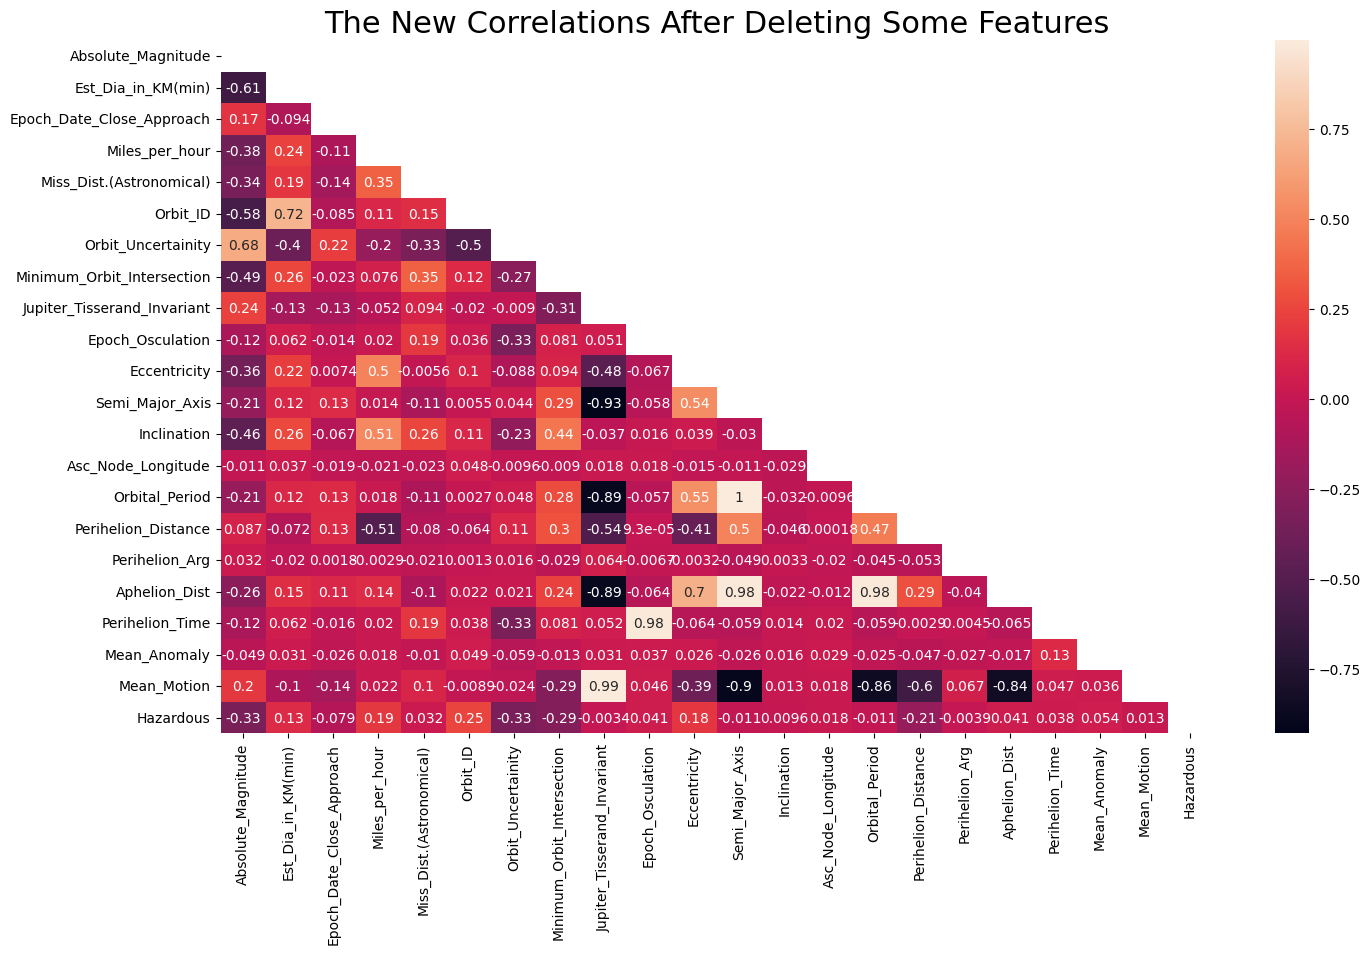

In [29]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),mask=np.triu(np.ones_like(df.corr(),dtype=np.bool)),annot=True)
title = 'The New Correlations After Deleting Some Features'
plt.title(title,loc='center',fontsize=22)
plt.show()

###### When the P value is less than 0.05,then we can say that feature does not affect to the target so we can remove them akll

In [30]:
df.columns

Index(['Absolute_Magnitude', 'Est_Dia_in_KM(min)', 'Close_Approach_Date',
       'Epoch_Date_Close_Approach', 'Miles_per_hour',
       'Miss_Dist.(Astronomical)', 'Orbit_ID', 'Orbit_Determination_Date',
       'Orbit_Uncertainity', 'Minimum_Orbit_Intersection',
       'Jupiter_Tisserand_Invariant', 'Epoch_Osculation', 'Eccentricity',
       'Semi_Major_Axis', 'Inclination', 'Asc_Node_Longitude',
       'Orbital_Period', 'Perihelion_Distance', 'Perihelion_Arg',
       'Aphelion_Dist', 'Perihelion_Time', 'Mean_Anomaly', 'Mean_Motion',
       'Hazardous'],
      dtype='object')

In [31]:
df.drop(['Jupiter_Tisserand_Invariant','Inclination','Perihelion_Arg'],inplace=True,axis=1)

In [32]:
df.columns

Index(['Absolute_Magnitude', 'Est_Dia_in_KM(min)', 'Close_Approach_Date',
       'Epoch_Date_Close_Approach', 'Miles_per_hour',
       'Miss_Dist.(Astronomical)', 'Orbit_ID', 'Orbit_Determination_Date',
       'Orbit_Uncertainity', 'Minimum_Orbit_Intersection', 'Epoch_Osculation',
       'Eccentricity', 'Semi_Major_Axis', 'Asc_Node_Longitude',
       'Orbital_Period', 'Perihelion_Distance', 'Aphelion_Dist',
       'Perihelion_Time', 'Mean_Anomaly', 'Mean_Motion', 'Hazardous'],
      dtype='object')

In [33]:
df.rename({'Est_Dia_in_KM(min)':'Est_Dia_in_KM','Miss_Dist.(Astronomical)':'Miss_Dist'},axis=1,inplace=True)

In [34]:
pd.DataFrame(df.corr().iloc[-1].sort_values(ascending=False))

/var/folders/2h/fvpsx_7j5qsbndf0sxjz6_d40000gn/T/ipykernel_5074/3280382716.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(df.corr().iloc[-1].sort_values(ascending=False))


,Hazardous
Hazardous,1.000000
Orbit_ID,0.247369
Miles_per_hour,0.191970
Eccentricity,0.183269
Est_Dia_in_KM,0.132424
Mean_Anomaly,0.054164
Epoch_Osculation,0.040940
Aphelion_Dist,0.040800
Perihelion_Time,0.038113
Miss_Dist,0.032407


In [35]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

Close_Approach_Date
Orbit_Determination_Date


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Absolute_Magnitude          4687 non-null   float64
 1   Est_Dia_in_KM               4687 non-null   float64
 2   Close_Approach_Date         4687 non-null   object 
 3   Epoch_Date_Close_Approach   4687 non-null   int64  
 4   Miles_per_hour              4687 non-null   float64
 5   Miss_Dist                   4687 non-null   float64
 6   Orbit_ID                    4687 non-null   int64  
 7   Orbit_Determination_Date    4687 non-null   object 
 8   Orbit_Uncertainity          4687 non-null   int64  
 9   Minimum_Orbit_Intersection  4687 non-null   float64
 10  Epoch_Osculation            4687 non-null   float64
 11  Eccentricity                4687 non-null   float64
 12  Semi_Major_Axis             4687 non-null   float64
 13  Asc_Node_Longitude          4687 

# We have 2 categoric variables and  1 boolean variable,let's define them as the numbers

In [37]:
df.Hazardous = df.Hazardous.astype('object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Absolute_Magnitude          4687 non-null   float64
 1   Est_Dia_in_KM               4687 non-null   float64
 2   Close_Approach_Date         4687 non-null   object 
 3   Epoch_Date_Close_Approach   4687 non-null   int64  
 4   Miles_per_hour              4687 non-null   float64
 5   Miss_Dist                   4687 non-null   float64
 6   Orbit_ID                    4687 non-null   int64  
 7   Orbit_Determination_Date    4687 non-null   object 
 8   Orbit_Uncertainity          4687 non-null   int64  
 9   Minimum_Orbit_Intersection  4687 non-null   float64
 10  Epoch_Osculation            4687 non-null   float64
 11  Eccentricity                4687 non-null   float64
 12  Semi_Major_Axis             4687 non-null   float64
 13  Asc_Node_Longitude          4687 

In [39]:
df.shape

(4687, 21)

In [40]:
df.tail(3)

,Absolute_Magnitude,Est_Dia_in_KM,Close_Approach_Date,Epoch_Date_Close_Approach,Miles_per_hour,Miss_Dist,Orbit_ID,Orbit_Determination_Date,Orbit_Uncertainity,Minimum_Orbit_Intersection,...,Eccentricity,Semi_Major_Axis,Asc_Node_Longitude,Orbital_Period,Perihelion_Distance,Aphelion_Dist,Perihelion_Time,Mean_Anomaly,Mean_Motion,Hazardous
4684,22.700,0.076658,2016-09-08,1473318000000,16086.983633,0.061009,17,2017-04-06 08:23:43,6,0.059972,...,0.368055,1.528234,37.026468,690.054279,0.965760,2.090708,2.458300e+06,203.501147,0.521698,False
4685,21.800,0.116026,2016-09-08,1473318000000,25393.489071,0.260760,6,2017-04-06 08:23:42,5,0.177510,...,0.202565,1.486600,163.802910,662.048343,1.185467,1.787733,2.458288e+06,203.524965,0.543767,False
4686,19.109,0.400641,2016-09-08,1473318000000,80409.512650,0.462372,13,2017-04-29 06:18:33,6,0.051777,...,0.405642,1.474045,187.642183,653.679098,0.876110,2.071980,2.458319e+06,184.820424,0.550729,False


# So much category for the 4687 values

In [41]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(f"{i}:{df[i].nunique()}")

Close_Approach_Date:777
Orbit_Determination_Date:2680
Hazardous:2


In [42]:
df.Close_Approach_Date.value_counts()

2016-07-22    18
2015-01-15    17
2015-02-15    16
2012-03-15    16
2014-11-22    16
              ..
2000-05-08     1
1999-05-15     1
1998-09-15     1
1999-04-22     1
2001-06-22     1
Name: Close_Approach_Date, Length: 777, dtype: int64

In [43]:
for i,j in enumerate(df.Close_Approach_Date):
    if '1995' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'1995')
    elif '1996' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'1996')
    elif '1997' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'1997')
    elif '1998' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'1998')
    elif '1999' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'1999')
    elif '2000' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2000')
    elif '2001' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2001')
    elif '2002' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2002')
    elif '2003' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2003')
    elif '2004' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2004')
    elif '2005' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2005')
    elif '2006' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2006')
    elif '2007' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2007')
    elif '2008' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2008')
    elif '2009' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2009')
    elif '2010' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2010')
    elif '2011' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2011')
    elif '2012' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2012')
    elif '2013' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2013')
    elif '2014' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2014')
    elif '2015' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2015')
    elif '2016' in df.Close_Approach_Date[i]:
        df['Close_Approach_Date'] = df['Close_Approach_Date'].replace([j],'2016')
    

In [44]:
df.Close_Approach_Date.value_counts()

2014    337
2015    324
2012    281
2013    256
2011    245
2016    243
2008    230
2010    229
2009    227
2007    217
2006    216
2004    200
2005    192
2000    179
2003    178
2001    178
1998    177
2002    164
1999    162
1995    161
1997    155
1996    136
Name: Close_Approach_Date, dtype: int64

In [45]:
df.Orbit_Determination_Date.value_counts()

2017-06-21 06:17:20    9
2017-04-06 09:24:24    8
2017-04-06 08:57:13    8
2017-05-03 06:18:20    7
2017-04-06 08:26:19    7
                      ..
2017-04-06 09:22:43    1
2017-04-06 09:09:56    1
2017-04-06 09:10:02    1
2017-04-06 08:22:38    1
2017-04-29 06:18:33    1
Name: Orbit_Determination_Date, Length: 2680, dtype: int64

In [46]:
for i,j in enumerate(df.Orbit_Determination_Date):
    if '2017-04' in df.Orbit_Determination_Date[i]:
        df['Orbit_Determination_Date'] = df['Orbit_Determination_Date'].replace([j],'2017:04')
    elif '2017-06' in df.Orbit_Determination_Date[i]:
        df['Orbit_Determination_Date'] = df['Orbit_Determination_Date'].replace([j],'2017:06')
    elif '2017-05' in df.Orbit_Determination_Date[i]:
        df['Orbit_Determination_Date'] = df['Orbit_Determination_Date'].replace([j],'2017:05')
    elif '2017-09' in df.Orbit_Determination_Date[i]:
        df['Orbit_Determination_Date'] = df['Orbit_Determination_Date'].replace([j],'2017:09')
    elif '2016' in df.Orbit_Determination_Date[i]:
        df['Orbit_Determination_Date'] = df['Orbit_Determination_Date'].replace([j],'2016')
    elif '2017-07' in df.Orbit_Determination_Date[i]:
        df['Orbit_Determination_Date'] = df['Orbit_Determination_Date'].replace([j],'2017:07')
    else:
        df['Orbit_Determination_Date'] = df['Orbit_Determination_Date'].replace([j],'2023')

In [47]:
df.Orbit_Determination_Date.value_counts()

2017:04    3939
2017:09     202
2023        127
2017:07     126
2017:05     119
2017:06      96
2016         78
Name: Orbit_Determination_Date, dtype: int64

In [48]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(f"{i}:{df[i].nunique()}")

Close_Approach_Date:22
Orbit_Determination_Date:7
Hazardous:2


In [49]:
df['Hazardous'] = df['Hazardous'].map({True:1,False:0})

In [50]:
df.head()

,Absolute_Magnitude,Est_Dia_in_KM,Close_Approach_Date,Epoch_Date_Close_Approach,Miles_per_hour,Miss_Dist,Orbit_ID,Orbit_Determination_Date,Orbit_Uncertainity,Minimum_Orbit_Intersection,...,Eccentricity,Semi_Major_Axis,Asc_Node_Longitude,Orbital_Period,Perihelion_Distance,Aphelion_Dist,Perihelion_Time,Mean_Anomaly,Mean_Motion,Hazardous
0,21.6,0.127220,1995,788947200000,13680.509944,0.419483,17,2017:04,5,0.025282,...,0.425549,1.407011,314.373913,609.599786,0.808259,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,1995,788947200000,40519.173105,0.383014,21,2017:04,3,0.186935,...,0.351674,1.107776,136.717242,425.869294,0.718200,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,1995,789552000000,16979.661798,0.050956,22,2017:04,0,0.043058,...,0.348248,1.458824,259.475979,643.580228,0.950791,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,1995,790156800000,24994.839864,0.285322,7,2017:04,6,0.005512,...,0.216578,1.255903,57.173266,514.082140,0.983902,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,1995,790156800000,22012.954985,0.407832,25,2017:04,1,0.034798,...,0.210448,1.225615,84.629307,495.597821,0.967687,1.483543,2.457814e+06,135.142133,0.726395,1


In [51]:
df.dtypes

Absolute_Magnitude            float64
Est_Dia_in_KM                 float64
Close_Approach_Date            object
Epoch_Date_Close_Approach       int64
Miles_per_hour                float64
Miss_Dist                     float64
Orbit_ID                        int64
Orbit_Determination_Date       object
Orbit_Uncertainity              int64
Minimum_Orbit_Intersection    float64
Epoch_Osculation              float64
Eccentricity                  float64
Semi_Major_Axis               float64
Asc_Node_Longitude            float64
Orbital_Period                float64
Perihelion_Distance           float64
Aphelion_Dist                 float64
Perihelion_Time               float64
Mean_Anomaly                  float64
Mean_Motion                   float64
Hazardous                       int64
dtype: object

In [55]:
!pip3 install sklearn

In [56]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 3.2 MB/s eta 0:00:0000:0100:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [58]:
import sklearn

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)

Close_Approach_Date
Orbit_Determination_Date


In [65]:
df['Close_Approach_Date'] = df['Close_Approach_Date'].astype('category')
df['Orbit_Determination_Date'] = df['Orbit_Determination_Date'].astype('category')

In [66]:
df['Close_Approach_Date'] = df['Close_Approach_Date'].cat.codes
df['Orbit_Determination_Date'] = df['Orbit_Determination_Date'].cat.codes

In [67]:
one_hotEnc = OneHotEncoder()
one_hotEnc.fit_transform([['Close_Approach_Date','Orbit_Determination_Date']])

<1x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [96]:
df.head()

,Absolute_Magnitude,Est_Dia_in_KM,Close_Approach_Date,Epoch_Date_Close_Approach,Miles_per_hour,Miss_Dist,Orbit_ID,Orbit_Determination_Date,Orbit_Uncertainity,Minimum_Orbit_Intersection,...,Eccentricity,Semi_Major_Axis,Asc_Node_Longitude,Orbital_Period,Perihelion_Distance,Aphelion_Dist,Perihelion_Time,Mean_Anomaly,Mean_Motion,Hazardous
0,21.6,0.127220,0,788947200000,13680.509944,0.419483,17,1,5,0.025282,...,0.425549,1.407011,314.373913,609.599786,0.808259,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,0,788947200000,40519.173105,0.383014,21,1,3,0.186935,...,0.351674,1.107776,136.717242,425.869294,0.718200,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,0,789552000000,16979.661798,0.050956,22,1,0,0.043058,...,0.348248,1.458824,259.475979,643.580228,0.950791,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,0,790156800000,24994.839864,0.285322,7,1,6,0.005512,...,0.216578,1.255903,57.173266,514.082140,0.983902,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,0,790156800000,22012.954985,0.407832,25,1,1,0.034798,...,0.210448,1.225615,84.629307,495.597821,0.967687,1.483543,2.457814e+06,135.142133,0.726395,1


# Train Test Splitting

In [100]:
X = df.drop(df.iloc[:,-1:],axis=1)
y = df.iloc[:,-1:]

# Feature Scalling

In [105]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
X = mm_scaler.fit_transform(X)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

# Importing basic XGBoost algorithm

In [112]:
! python3 -m pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.8 MB/s eta 0:00:0000:0100:010m


In [113]:
import xgboost

In [114]:
from xgboost import XGBRFClassifier
xg_classifier = XGBRFClassifier()

In [115]:
xg_classifier.fit(X_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=None,
                reg_alpha=None, ...)

In [116]:
xg_pred = xg_classifier.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [119]:
print(f"The accuracy score is {accuracy_score(xg_pred,y_test)}")

The accuracy score is 0.997867803837953


In [131]:
c_matrix = confusion_matrix(xg_pred,y_test)

# Visualize Confusion Matrix

In [130]:
from sklearn.metrics import ConfusionMatrixDisplay

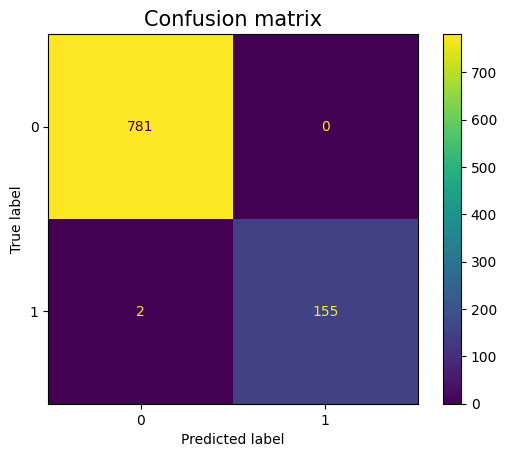

In [134]:
disp = ConfusionMatrixDisplay(c_matrix)
disp.plot()
plt.title('Confusion matrix',loc='center',fontsize=15)
plt.show()

# RandomizedSearchCV

In [139]:
from sklearn.model_selection import RandomizedSearchCV

In [140]:
xgb = XGBRFClassifier()

In [143]:
parameters = {
             'learning_rate':[0.01,0.05,0.1,0.15,0.2,0.25,0.3],
             'max_depth':[2,3,4,6,8,10,12],
             'min_child_weight':[1,2,3,5,6,7,9],
             'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7],
             'colsample_bytree':[0.2,0.3,0.5,0.6,0.7,0.8,0.9]
             }

In [150]:
random_search = RandomizedSearchCV(estimator=xgb,
                                   param_distributions=parameters
                                   #random_state=42,
                                   #verbose=3,
                                   #n_iter=-1,
                                   #cv=5
                          )

In [151]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             gpu_id=None, grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             max_bin=None,
                                             max_cat_threshold=None,
                                             ma...
                                             n_estimators=100, n_jobs=None,
                                             num_parallel_tree=None,
                                             objective='binary:logistic',
                                             predictor=None, random_state=None,
                                             reg_alpha=None, ...),
                   param_distributions={'colsample_bytree': [0.2, 0.3, 0.5, 0.6,
                                                             0.7, 0.8, 0.9],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2, 0.25, 0.3],
                                        'max_depth': [2, 3, 4, 6, 8, 10, 12],
                                        'min_child_weight': [1, 2, 3, 5, 6, 7,
                                                             9]})

In [152]:
random_search.best_params_

{'min_child_weight': 9,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.7,
 'colsample_bytree': 0.7}

In [153]:
random_search.best_score_

0.9946648865153538

# Bayesian Optimization with Skopt

In [155]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 672.0 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [159]:
from skopt import BayesSearchCV
from skopt.space import Real,Integer,Categorical

In [160]:
bayes_xgb = XGBRFClassifier()

In [167]:
 parameters = { 
   'learning_rate':[0.01,0.05,0.1,0.15,0.2,0.25,0.3],
   'max_depth':[2,3,4,6,8,10,12],
   'min_child_weight':[1,2,3,5,6,7,9],
   'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7],
   'colsample_bytree':[0.2,0.3,0.5,0.6,0.7,0.8,0.9]
                   }

In [169]:
opt_bys = BayesSearchCV(estimator=bayes_xgb,search_spaces=parameters)

In [170]:
opt_bys.fit(X_train,y_train)

BayesSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bytree=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=None, gpu_id=None,
                                        grow_policy=None, importance_type=None,
                                        interaction_constraints=None,
                                        max_bin=None, max_cat_threshold=None,
                                        max_cat...
                                        n_estimators=100, n_jobs=None,
                                        num_parallel_tree=None,
                                        objective='binary:logistic',
                                        predictor=None, random_state=None,
                                        reg_alpha=None, ...),
              search_spaces={'colsample_bytree': [0.2, 0.3, 0.5, 0.6, 0.7, 0.8,
                                                  0.9],
                             'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                             'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25,
                                               0.3],
                             'max_depth': [2, 3, 4, 6, 8, 10, 12],
                             'min_child_weight': [1, 2, 3, 5, 6, 7, 9]})

In [171]:
opt_bys.best_params_

OrderedDict([('colsample_bytree', 0.7),
             ('gamma', 0.2),
             ('learning_rate', 0.25),
             ('max_depth', 8),
             ('min_child_weight', 1)])

In [172]:
opt_bys.best_score_

0.9951992879394748